In [205]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [206]:
df = pd.read_csv('salary_data_cleaned.csv')

In [207]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\r\n,NM,0,47,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\r\n,MD,0,36,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4\r\n,FL,1,10,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL\r\n,WA,1,55,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions\r\n,NY,1,22,1,0,0,0,1


In [208]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel'],
      dtype='object')

In [209]:
def title_simplifier(title):
    if 'data scientist' in title.lower() or 'data science' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower() or 'analytics' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    elif 'research' in title.lower():
        return 'research scientist'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower() or 'junior' in title.lower():
        return 'jr'
    else:
        return 'na'

In [210]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [211]:
df["job_simp"].value_counts()

data scientist        313
na                    139
analyst               123
data engineer         119
mle                    22
research scientist     19
director                5
manager                 2
Name: job_simp, dtype: int64

In [212]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        519
senior    220
jr          3
Name: seniority, dtype: int64

In [213]:
# Fix state Los Angeles 
df['job_state']= df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df.job_state.value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
WA     21
NC     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
UT     10
IN     10
WI     10
AZ      9
MO      9
AL      8
DE      6
GA      6
MI      6
KY      6
IA      5
CT      5
NE      4
OR      4
LA      4
NM      3
KS      3
MN      2
ID      2
RI      1
SC      1
Name: job_state, dtype: int64

In [214]:
#  Job description length 
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0       2555
1       4828
2       3495
3       3926
4       2748
5       3783
6       1808
7       3847
8       1561
9       4609
10      2789
11      3522
12      3980
13      4942
14      3799
15      1902
16      3676
17      4201
18      3549
19      4434
20      2944
21      6967
22      6472
23      2951
24      3806
25      3728
26      4452
27      4984
28      5057
29      3495
30      3926
31      3376
32      5126
33      2378
34      2187
35      1753
36      5044
37      3736
38      3602
39      1758
40      3079
41      2042
42      3872
43      3558
44      9165
45      3239
46      7325
47      3438
48      2730
49      2769
50      2953
51      4277
52      1649
53      4772
54      4495
55      3590
56      4244
57      5065
58      1808
59      3783
60      4852
61      1409
62      2962
63      4991
64      2527
65      1963
66      3123
67      8451
68      2352
69      2312
70      1902
71      2929
72      2703
73      4501
74      2651
75      4333
76      3437

In [215]:
#Competitor count
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [216]:
df['Competitors']

0                                                     -1
1                                                     -1
2                                                     -1
3      Oak Ridge National Laboratory, National Renewa...
4                   Commerce Signals, Cardlytics, Yodlee
5                      Digital Realty, CoreSite, Equinix
6                                                     -1
7                                                     -1
8                                                     -1
9                              Clicktripz, SmarterTravel
10                                                    -1
11                                                    -1
12                      Target, Costco Wholesale, Amazon
13                                                    -1
14                              Novartis, Baxter, Pfizer
15                                                    -1
16          bluebird bio, Agios Pharmaceuticals, Celgene
17                             

In [217]:
#hourly wage to annual 

df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis =1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis =1)

In [218]:
df['avg_salary'] = (df.min_salary+df.max_salary)/2

In [219]:
df[df["hourly"]==1][["min_salary", "max_salary", "avg_salary"]]

,min_salary,max_salary,avg_salary
165,34,48,41.0
177,42,68,55.0
197,36,50,43.0
202,42,68,55.0
210,30,50,40.0
246,34,48,41.0
271,42,68,55.0
337,36,50,43.0
345,48,78,63.0
357,42,68,55.0


In [220]:
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\r', '').replace('\n',''))

In [221]:
df['company_txt']

0                                      Tecolote Research
1                  University of Maryland Medical System
2                                                KnowBe4
3                                                   PNNL
4                                     Affinity Solutions
5                                               CyrusOne
6                                     ClearOne Advantage
7                                             Logic20/20
8                              Rochester Regional Health
9                                               <intent>
10                                                  Wish
11                                               ManTech
12                                               Walmart
13                                                Yesler
14                                Takeda Pharmaceuticals
15                                               Audible
16                                   Blueprint Medicines
17                             

In [222]:
#Azure
df['azure'] = df['Job Description'].apply(lambda x: 1 if 'azure' in x.lower() else 0)
df.azure.value_counts()

0    688
1     54
Name: azure, dtype: int64

In [223]:
#SQl
df['SQL'] = df['Job Description'].apply(lambda x: 1 if 'sql' in x.lower() or 'structured query language' in x.lower() else 0)
df.SQL.value_counts()

1    380
0    362
Name: SQL, dtype: int64

In [224]:
#Tableau
df['tableau_yn'] = df['Job Description'].apply(lambda x: 1 if 'tableau' in x.lower() else 0)
df.tableau_yn.value_counts()

0    594
1    148
Name: tableau_yn, dtype: int64

In [225]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,R_yn,spark,aws,excel,desc_len,num_comp,azure,SQL,tableau_yn
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,101.434636,0.557951,46.591644,0.528302,0.002695,0.225067,0.237197,0.522911,3910.172507,1.053908,0.072776,0.512129,0.199461
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,37.546122,0.496965,53.778815,0.499535,0.051882,0.417908,0.425651,0.499812,1533.827777,1.384239,0.259944,0.500190,0.399865
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,15.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2834.000000,0.000000,0.000000,0.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3781.500000,0.000000,0.000000,1.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4772.000000,3.000000,0.000000,1.000000,0.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10146.000000,4.000000,1.000000,1.000000,1.000000


In [226]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp', 'azure', 'SQL', 'tableau_yn'],
      dtype='object')

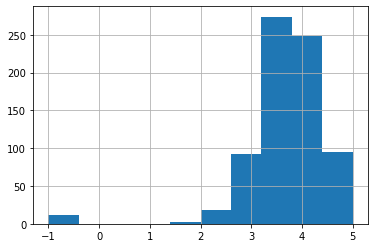

In [227]:
df["Rating"].hist()

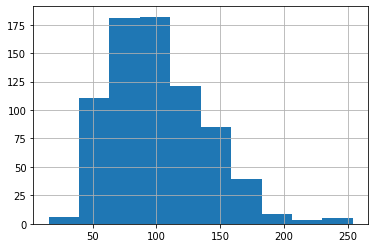

In [228]:
df["avg_salary"].hist()

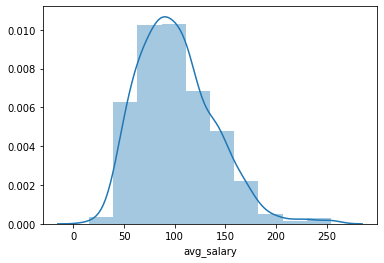

In [229]:
sns.distplot(df["avg_salary"], bins=10)

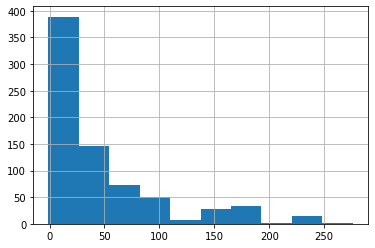

In [230]:
df["age"].hist()

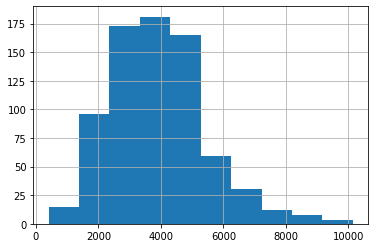

In [231]:
df["desc_len"].hist()

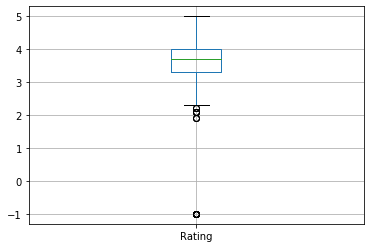

In [232]:
df.boxplot(column='Rating')

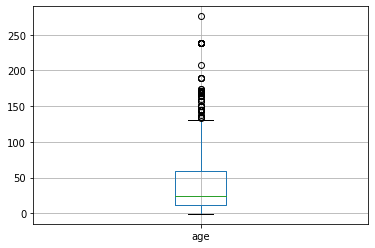

In [233]:
df.boxplot(column='age')

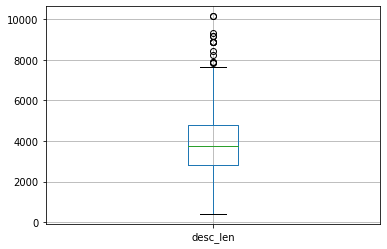

In [234]:
df.boxplot(column='desc_len')

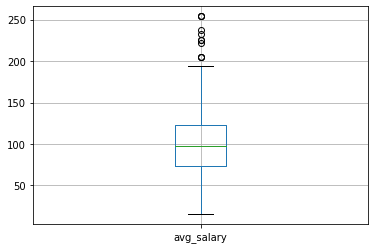

In [235]:
df.boxplot(column='avg_salary')

In [236]:
df.corr().avg_salary.sort_values(ascending=False)
# python, aws, spark are highly correlated with avg_salary

avg_salary           1.000000
max_salary           0.990066
min_salary           0.978714
python_yn            0.316423
aws                  0.172602
spark                0.171104
employer_provided    0.094734
num_comp             0.083263
desc_len             0.069742
age                  0.021996
azure                0.019224
Rating               0.012517
SQL                  0.003366
Founded             -0.009947
same_state          -0.040823
R_yn                -0.042516
excel               -0.071492
tableau_yn          -0.074052
hourly              -0.250626
Name: avg_salary, dtype: float64

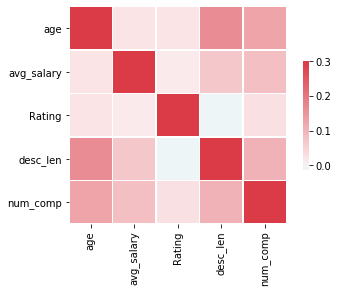

In [237]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age','avg_salary','Rating','desc_len','num_comp']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [238]:
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt', 'job_state','same_state', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'azure', 'SQL', 'job_simp', 'seniority']]

graph for Location: total = 20


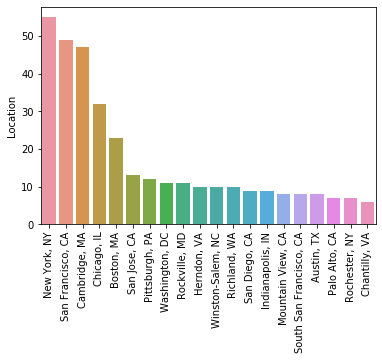

graph for Headquarters: total = 20


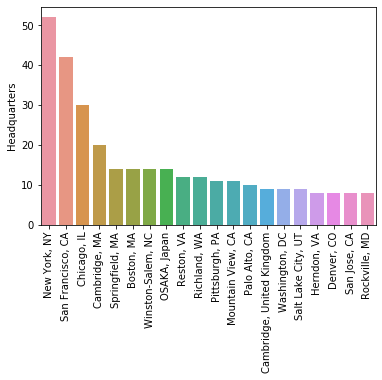

graph for Industry: total = 20


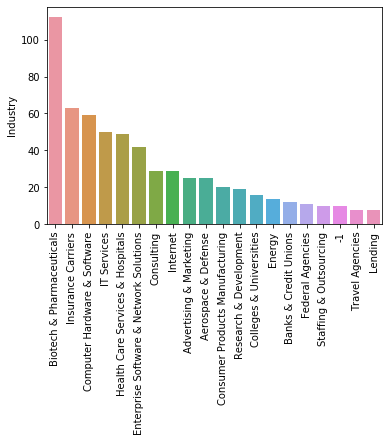

graph for Sector: total = 20


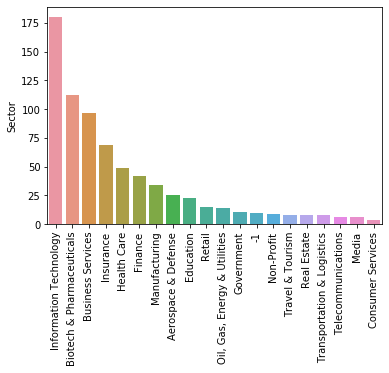

graph for company_txt: total = 20


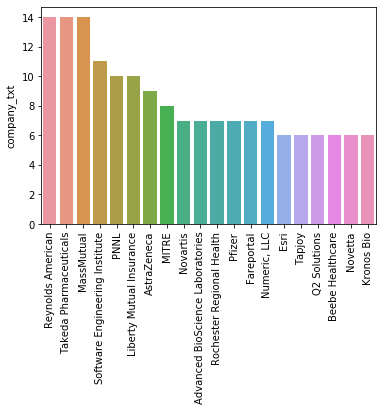

graph for job_state: total = 20


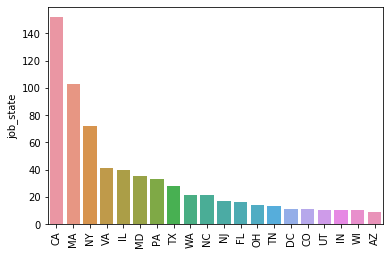

In [239]:
for i in df_cat[['Location', 'Headquarters','Industry','Sector','company_txt','job_state']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [240]:
df_cat["Type of ownership"].value_counts()[:20]

Company - Private                 410
Company - Public                  193
Nonprofit Organization             55
Subsidiary or Business Segment     34
Government                         15
Hospital                           15
College / University               13
Other Organization                  3
School / School District            2
Unknown                             1
-1                                  1
Name: Type of ownership, dtype: int64

In [241]:
pd.pivot_table(df, index=['job_simp'], values='avg_salary')

,avg_salary
job_simp,
analyst,66.922764
data engineer,105.403361
data scientist,118.293930
director,130.800000
manager,85.250000
mle,126.431818
na,86.920863
research scientist,93.473684


In [242]:
pd.pivot_table(df, index=['job_simp','seniority'], values='avg_salary')

avg_salary
job_simp           seniority            
analyst            jr          53.250000
                   na          63.430851
                   senior      80.092593
data engineer      na          96.701220
                   senior     124.689189
data scientist     jr         106.500000
                   na         110.191038
                   senior     135.590000
director           na         130.800000
manager            na          85.250000
mle                na         119.133333
                   senior     142.071429
na                 na          76.117347
                   senior     112.743902
research scientist na          87.000000
                   senior     102.375000

In [243]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [244]:
pd.pivot_table(df, index=['job_state', 'job_simp'], values='avg_salary').sort_values('job_state', ascending=False)

avg_salary
job_state job_simp                      
WI        na                   54.000000
          data scientist      113.500000
          analyst              58.833333
WA        na                   97.500000
          data scientist       99.764706
          analyst              54.500000
VA        mle                  87.000000
          data scientist      102.086957
          data engineer        96.900000
          analyst              71.583333
UT        analyst              54.750000
          data engineer       100.333333
          data scientist      140.500000
TX        research scientist   67.666667
          na                   43.000000
          data scientist      100.730769
          data engineer       113.062500
TN        data scientist       96.000000
          data engineer       100.950000
          analyst              27.000000
SC        na                   60.500000
RI        analyst             100.000000
PA        manager              74.000000
          data engineer        91.500000
          data scientist      115.800000
          analyst              62.750000
          mle                 120.500000
          research scientist  124.000000
          na                   60.500000
OR        data scientist       98.500000
          data engineer        73.000000
OH        research scientist   93.500000
          na                   86.500000
          data scientist      105.285714
          analyst              53.875000
NY        analyst              68.866667
          research scientist   61.000000
          na                   80.350000
          mle                 125.000000
          data scientist      115.250000
          data engineer        86.375000
NM        data scientist       74.333333
NJ        na                   82.500000
          data scientist      125.083333
          data engineer       112.000000
          analyst              90.062500
NE        research scientist   57.000000
          na                   50.000000
NC        research scientist   65.500000
          na                   96.000000
          data scientist      117.000000
          data engineer       104.250000
MO        na                   72.333333
          data scientist      127.666667
          analyst              54.166667
MN        data engineer        95.000000
          analyst              76.000000
MI        data scientist      106.625000
          analyst              87.500000
MD        na                   88.750000
          data scientist      109.115385
          data engineer       109.000000
          analyst              80.666667
MA        research scientist  124.071429
          na                  110.114286
          manager              96.500000
          director            130.800000
          data scientist      106.500000
          data engineer       107.291667
          analyst              60.416667
LA        data engineer        70.500000
          analyst              48.000000
          na                   40.000000
KY        na                  103.500000
          data scientist       84.000000
KS        mle                  87.000000
IN        na                   51.500000
          data scientist       91.833333
          data engineer       114.500000
          analyst              66.500000
IL        na                   52.500000
          mle                 133.000000
          data scientist      147.095238
          data engineer        96.125000
          analyst              66.500000
ID        analyst              56.250000
IA        data engineer       102.833333
          analyst              43.000000
GA        data scientist       81.333333
          na                   80.000000
FL        data scientist       97.357143
          data engineer        91.833333
          analyst              47.500000
DE        na                   55.000000
DC        data scientist      149.000000
          data engineer        85.000000
          an

In [245]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp', 'azure', 'SQL', 'tableau_yn'],
      dtype='object')

In [246]:
# salary by rating, Rating, Location, Size, Industry, Sector, Type of Ownership, desc_len, job_state, spark, aws, python, excel, job_simp, 
# seniority

In [247]:
df_pivots = df[['Rating', 'Industry','Size', 'Sector','job_state', 'Revenue', 'num_comp', 'hourly', 'employer_provided', 'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'azure','SQL', 'Type of ownership','avg_salary']]

In [248]:
for i in df_pivots.columns:
    print(i)
    if i != 'avg_salary':
        print(pd.pivot_table(df_pivots, index=i, values='avg_salary').sort_values('avg_salary', ascending=False))

Rating
        avg_salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 4.0    107.170213
 3.2    106.928571
 3.7    105.680328
 3.5    104.897959
 4.7    103.983871
 3.3    103.897436
 4.3    102.468750
 4.2    100.442308
 2.2     97.750000
 3.8     97.418033
 4.6     97.250000
 2.1     95.900000
 3.4     93.465909
 3.6     89.945652
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 2.7     85.178571
 2.8     83.928571
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
Industry
                                          avg_salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services            

In [249]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'SQL', values = 'avg_salary', aggfunc = 'count')

SQL,0,1
Revenue,,
$1 to $2 billion (USD),30.0,30.0
$1 to $5 million (USD),6.0,2.0
$10 to $25 million (USD),10.0,22.0
$10+ billion (USD),77.0,47.0
$100 to $500 million (USD),37.0,54.0
$2 to $5 billion (USD),14.0,25.0
$25 to $50 million (USD),21.0,19.0
$5 to $10 billion (USD),1.0,18.0
$5 to $10 million (USD),11.0,7.0


In [250]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

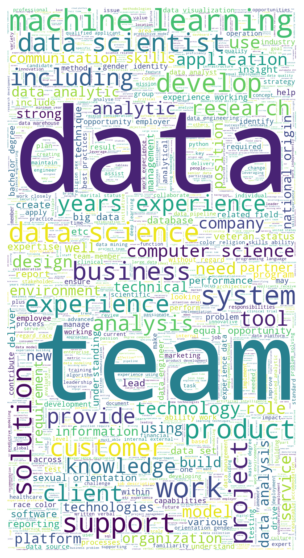

In [251]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

In [252]:
df.to_csv('eda_data.csv')